<a href="https://colab.research.google.com/github/AugustineY07/ds4ph-bme/blob/master/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
import statsmodels as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

The code below fit linear regression model of bmi to log(rdi4p+1).

Beta0 = is the intercept, meaning the expected value of response logrdi4p ~= 1.7154 at the average of predictor bmi ~= 28.5 after mean-centered the data.

Beta1 = 0.0722 is the slope, meaning that the expected value of response logrdi4p changes 0.0722 for every unit change of bmi.

In [123]:
# download data
! wget https://raw.githubusercontent.com/ds4ph-bme/assignment-7-AugustineY07/main/shhs.txt?token=AKODSOI6OKSFDPLUD74KWWLAQI34I
dat = pd.read_csv("shhs.txt?token=AKODSOI6OKSFDPLUD74KWWLAQI34I")
# calculate log(rdi4p + 1)
logrdi4p = np.log(dat['rdi4p'] + 1)
dat.insert(12, "logrdi4p", logrdi4p, True)
# select cols 
dat = dat[['bmi', 'logrdi4p']].dropna()
# remove rows with '.' and convert to numeric
dat = dat[dat.bmi != '.']
dat['bmi'] = dat.bmi.astype(float)
# mean center bmi
m = dat['bmi'].mean()
mcbmi = dat['bmi'] - m
dat.insert(2, "mcbmi", mcbmi, True)

--2021-04-16 05:15:37--  https://raw.githubusercontent.com/ds4ph-bme/assignment-7-AugustineY07/main/shhs.txt?token=AKODSOI6OKSFDPLUD74KWWLAQI34I
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824192 (805K) [text/plain]
Saving to: ‘shhs.txt?token=AKODSOI6OKSFDPLUD74KWWLAQI34I.58’

shhs.txt?token=AKOD 100%[===================>] 804.88K  --.-KB/s    in 0.02s   

2021-04-16 05:15:37 (50.3 MB/s) - ‘shhs.txt?token=AKODSOI6OKSFDPLUD74KWWLAQI34I.58’ saved [824192/824192]



In [124]:
fit = smf.ols('logrdi4p ~ bmi', data = dat).fit()
fitmc = smf.ols('logrdi4p ~ mcbmi', data = dat).fit()
print(fitmc.summary())

                            OLS Regression Results                            
Dep. Variable:               logrdi4p   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     973.8
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          5.47e-199
Time:                        05:15:37   Log-Likelihood:                -8893.0
No. Observations:                6333   AIC:                         1.779e+04
Df Residuals:                    6331   BIC:                         1.780e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7154      0.012    138.510      0.0

Below is a scatterplot of the data and fitted line.

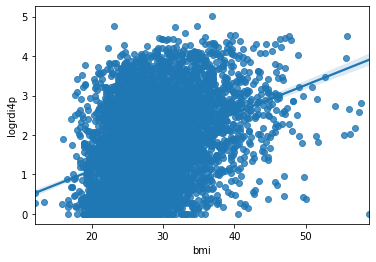

In [125]:
sns.regplot(x = 'bmi', y ='logrdi4p', data = dat)


The predicted rdi4p = 5.19 for a person with bmi = 30.

In [136]:
newd = {'bmi': 30}
pred = fit.predict(newd)
ypred = np.exp(pred) - 1
print(ypred)

0    5.192413
dtype: float64
